In [1]:
!pip install kaggle

In [2]:
# configuring the path of Kaggle.json file
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

Importing FaceMask Dataset

In [3]:
# API to fetch the dataset from Kaggle
!kaggle datasets download -d omkargurav/face-mask-dataset

Dataset URL: https://www.kaggle.com/datasets/omkargurav/face-mask-dataset
License(s): unknown
 94% 153M/163M [00:00<00:00, 1.60GB/s]
100% 163M/163M [00:00<00:00, 1.56GB/s]


In [4]:
# extracting the compessed Dataset
from zipfile import ZipFile
dataset = '/content/face-mask-dataset.zip'

with ZipFile(dataset,'r') as zip:
  zip.extractall()
  print('The dataset is extracted')

The dataset is extracted


In [5]:
!ls

data  face-mask-dataset.zip  kaggle.json  sample_data


**Importing The Dependencies**

In [6]:
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv2
from google.colab.patches import cv2_imshow
from PIL import Image
from sklearn.model_selection import train_test_split


In [7]:
with_mask_files=os.listdir("/content/data/with_mask")
print(with_mask_files[0:5])
print(with_mask_files[-5:])

['with_mask_3040.jpg', 'with_mask_1694.jpg', 'with_mask_1409.jpg', 'with_mask_2791.jpg', 'with_mask_1100.jpg']
['with_mask_589.jpg', 'with_mask_249.jpg', 'with_mask_2375.jpg', 'with_mask_1959.jpg', 'with_mask_2713.jpg']


In [21]:
without_mask_files=os.listdir("/content/data/without_mask")
print(without_mask_files[0:5])
print(without_mask_files[-5:])

['without_mask_851.jpg', 'without_mask_3536.jpg', 'without_mask_2285.jpg', 'without_mask_12.jpg', 'without_mask_2887.jpg']
['without_mask_2995.jpg', 'without_mask_3806.jpg', 'without_mask_3677.jpg', 'without_mask_3195.jpg', 'without_mask_3617.jpg']


In [9]:
print("Number of with mask images :", len(with_mask_files))
print("Number of without mask images :", len(without_mask_files))

Number of with mask images : 3725
Number of without mask images : 3828


**Creating Labels for the two class of Images **

with mask--> 1

without mask--> 0

In [10]:
# creating the labels

with_mask_labels=[1]*3725
without_mask_labels=[0]*3828

In [11]:
print(with_mask_labels[0:5])
print(without_mask_labels[0:5])

[1, 1, 1, 1, 1]
[0, 0, 0, 0, 0]


In [12]:
print(len(with_mask_labels))
print(len(without_mask_labels))

3725
3828


In [18]:
labels=with_mask_labels+without_mask_labels

In [19]:
print(len(labels))
print(labels[0:5])
print(labels[-5:])


7553
[1, 1, 1, 1, 1]
[0, 0, 0, 0, 0]


**Displaying the** **images**

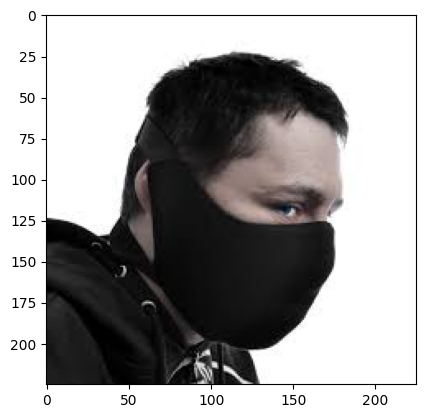

In [20]:
# displaying with mask image

img=mpimg.imread('/content/data/with_mask/with_mask_3040.jpg')
imgplot=plt.imshow(img)
plt.show()


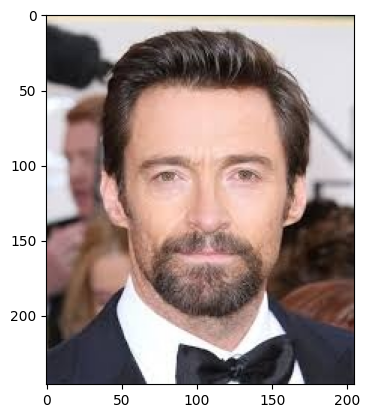

In [24]:
# displaying without mask image

img=mpimg.imread('/content/data/without_mask/without_mask_3617.jpg')
imgplot=plt.imshow(img)
plt.show()


**Image Processing**

1. Resize the images

2. convert images into numpy array






In [33]:
# covert images into numpy array

with_mask_path='/content/data/with_mask/'


data=[]
for img_file in with_mask_files:
  image=Image.open(with_mask_path+img_file)
  image=image.resize((128,128))
  image=image.convert('RGB')
  image=np.array(image)
  data.append(image)

/usr/local/lib/python3.12/dist-packages/PIL/Image.py:1047: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


In [34]:
# covert images into numpy array

without_mask_path='/content/data/without_mask/'



for img_file in without_mask_files:
  image=Image.open(without_mask_path+img_file)
  image=image.resize((128,128))
  image=image.convert('RGB')
  image=np.array(image)
  data.append(image)

In [35]:
len(data)

7553

In [36]:
type(data)

list

array([[[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       ...,

       [[ 30,  30,  30],
        [ 30,  30,  30],
        [ 30,  30,  30],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[ 30,  30,  30],
        [ 30,  30,  30],
        [ 30,  30,  30],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[ 30,  30,  30],
        [ 31,  31,  31],
        [ 31,  31,  31],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]]], dtype=uint8)
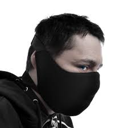

In [37]:
data[0]

In [38]:
type(data[0])

numpy.ndarray

In [40]:
# converting image list and list to numpy array

X=np.array(data)
Y=np.array(labels)

In [42]:
type(X)
type(Y)

numpy.ndarray

In [44]:
print(X.shape)
print(Y.shape)

(7553, 128, 128, 3)
(7553,)


***Train Test Split***

In [45]:
X_train, X_test, Y_train, Y_test=train_test_split(X, Y, test_size=0.2, random_state=2)

In [47]:
print(X.shape)
print(X_train.shape)
print(X_test.shape)

(7553, 128, 128, 3)
(6042, 128, 128, 3)
(1511, 128, 128, 3)


In [48]:
# scalling the data

X_train_scaled=X_train/255

X_test_scaled=X_test/255

In [50]:
X_train_scaled[0]

array([[[0.4       , 0.29411765, 0.31372549],
        [0.36862745, 0.25882353, 0.27843137],
        [0.31764706, 0.21960784, 0.23921569],
        ...,
        [0.21568627, 0.1254902 , 0.14901961],
        [0.22352941, 0.12941176, 0.15686275],
        [0.23137255, 0.12941176, 0.16470588]],

       [[0.36470588, 0.25882353, 0.28235294],
        [0.3372549 , 0.23137255, 0.25098039],
        [0.29411765, 0.19607843, 0.21960784],
        ...,
        [0.21176471, 0.12156863, 0.14509804],
        [0.21568627, 0.12156863, 0.14901961],
        [0.22745098, 0.1254902 , 0.16078431]],

       [[0.33333333, 0.22745098, 0.25490196],
        [0.29803922, 0.19215686, 0.21960784],
        [0.2627451 , 0.16078431, 0.19215686],
        ...,
        [0.21176471, 0.12156863, 0.15294118],
        [0.21176471, 0.12156863, 0.15294118],
        [0.21960784, 0.11764706, 0.15294118]],

       ...,

       [[0.35294118, 0.2627451 , 0.23921569],
        [0.34117647, 0.25098039, 0.22745098],
        [0.32156863, 0

Building a Convolutional Neural Networks (CNN)

In [51]:
import tensorflow as tf
from tensorflow import keras


In [53]:
num_of_classes=2

model=keras.Sequential()

model.add(keras.layers.Conv2D(32, kernel_size=(3,3), activation='relu', input_shape=(128,128,3)))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))

model.add(keras.layers.Conv2D(64, kernel_size=(3,3), activation='relu'))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))

model.add(keras.layers.Flatten())

model.add(keras.layers.Dense(128, activation='relu'))
model.add(keras.layers.Dropout(0.5))

model.add(keras.layers.Dense(64, activation='relu'))
model.add(keras.layers.Dropout(0.5))

model.add(keras.layers.Dense(num_of_classes, activation='sigmoid'))


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [54]:
#compile the neural network

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['acc'])

In [55]:

# Training the Neural Network

history=model.fit(X_train_scaled,Y_train, validation_split=0.1, epochs=5)



Epoch 1/5
170/170 ━━━━━━━━━━━━━━━━━━━━ 14s 44ms/step - acc: 0.7057 - loss: 0.6512 - val_acc: 0.8727 - val_loss: 0.2934
Epoch 2/5
170/170 ━━━━━━━━━━━━━━━━━━━━ 3s 20ms/step - acc: 0.8695 - loss: 0.3184 - val_acc: 0.8760 - val_loss: 0.2606
Epoch 3/5
170/170 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - acc: 0.8992 - loss: 0.2667 - val_acc: 0.9008 - val_loss: 0.2273
Epoch 4/5
170/170 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - acc: 0.9173 - loss: 0.2116 - val_acc: 0.8992 - val_loss: 0.2601
Epoch 5/5
170/170 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - acc: 0.9168 - loss: 0.2186 - val_acc: 0.9091 - val_loss: 0.2378


**Model Evaluation**

In [56]:
loss, accuracy= model.evaluate(X_test_scaled, Y_test)
print('Test Accuracy =', accuracy)

48/48 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - acc: 0.9126 - loss: 0.2305
Test Accuracy = 0.911316990852356


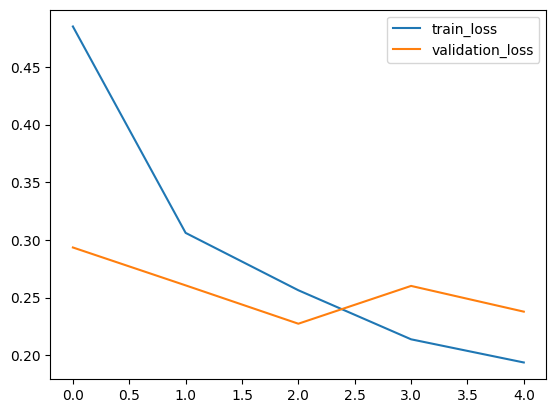

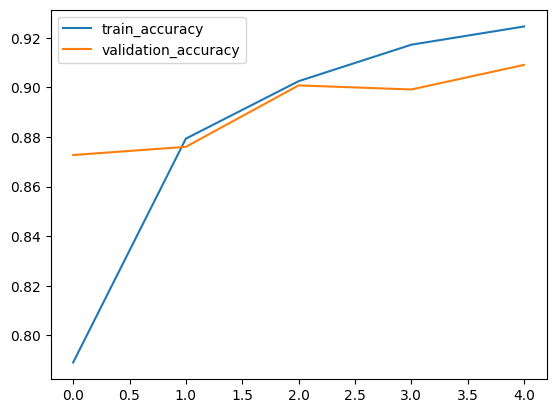

In [58]:
h=history

# plot the loss value

plt.plot(h.history['loss'], label='train_loss')
plt.plot(h.history['val_loss'], label='validation_loss')
plt.legend()
plt.show()

# plot the accuracy value

plt.plot(h.history['acc'], label='train_accuracy')
plt.plot(h.history['val_acc'], label='validation_accuracy')
plt.legend()
plt.show()

**Predictive System**

Path or URL of the image to be predicted: https://www.shutterstock.com/image-photo/happy-handsome-young-african-american-600nw-2432719071.jpg


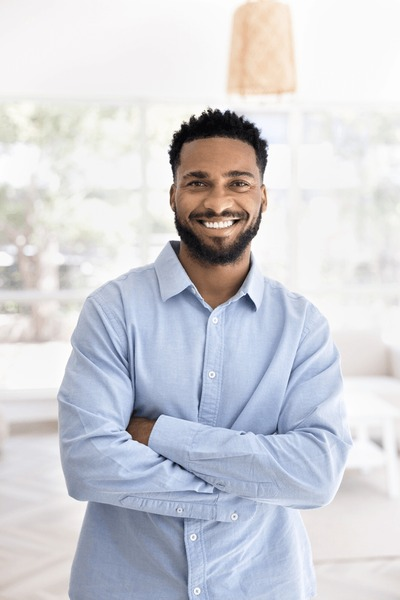

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
[[0.83901846 0.33053786]]
0
The person in the image is not wearing mask


In [68]:
import requests

input_image_path = input("Path or URL of the image to be predicted: ")

# Check if the input is a URL
if input_image_path.startswith('http://') or input_image_path.startswith('https://'):
    try:
        response = requests.get(input_image_path)
        response.raise_for_status() # Raise an exception for bad status codes
        with open('temp_image.jpg', 'wb') as f:
            f.write(response.content)
        input_image = cv2.imread('temp_image.jpg')
        os.remove('temp_image.jpg') # Clean up the temporary file
    except requests.exceptions.RequestException as e:
        print(f"Error downloading image: {e}")
        input_image = None
else:
    input_image = cv2.imread(input_image_path)


if input_image is None:
    print("Error: Could not read the image. Please check the path or URL.")
else:
    cv2_imshow(input_image)

    input_image_resize=cv2.resize(input_image, (128,128))

    input_image_scaled=input_image_resize/255

    input_image_reshaped=np.reshape(input_image_scaled, [1,128,128,3])

    input_prediction=model.predict(input_image_reshaped)

    print(input_prediction)

    input_pred_label=np.argmax(input_prediction)

    print(input_pred_label)

    if input_pred_label==1:
      print("The person in the image is wearing mask")
    else:
      print("The person in the image is not wearing mask")